In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

count the occurrences of each unique value in the "Species" column.

In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# label encoding the Species
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Species'] = lb.fit_transform(df['Species'])

Analyzing the Data

##Descriptive Statistics

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

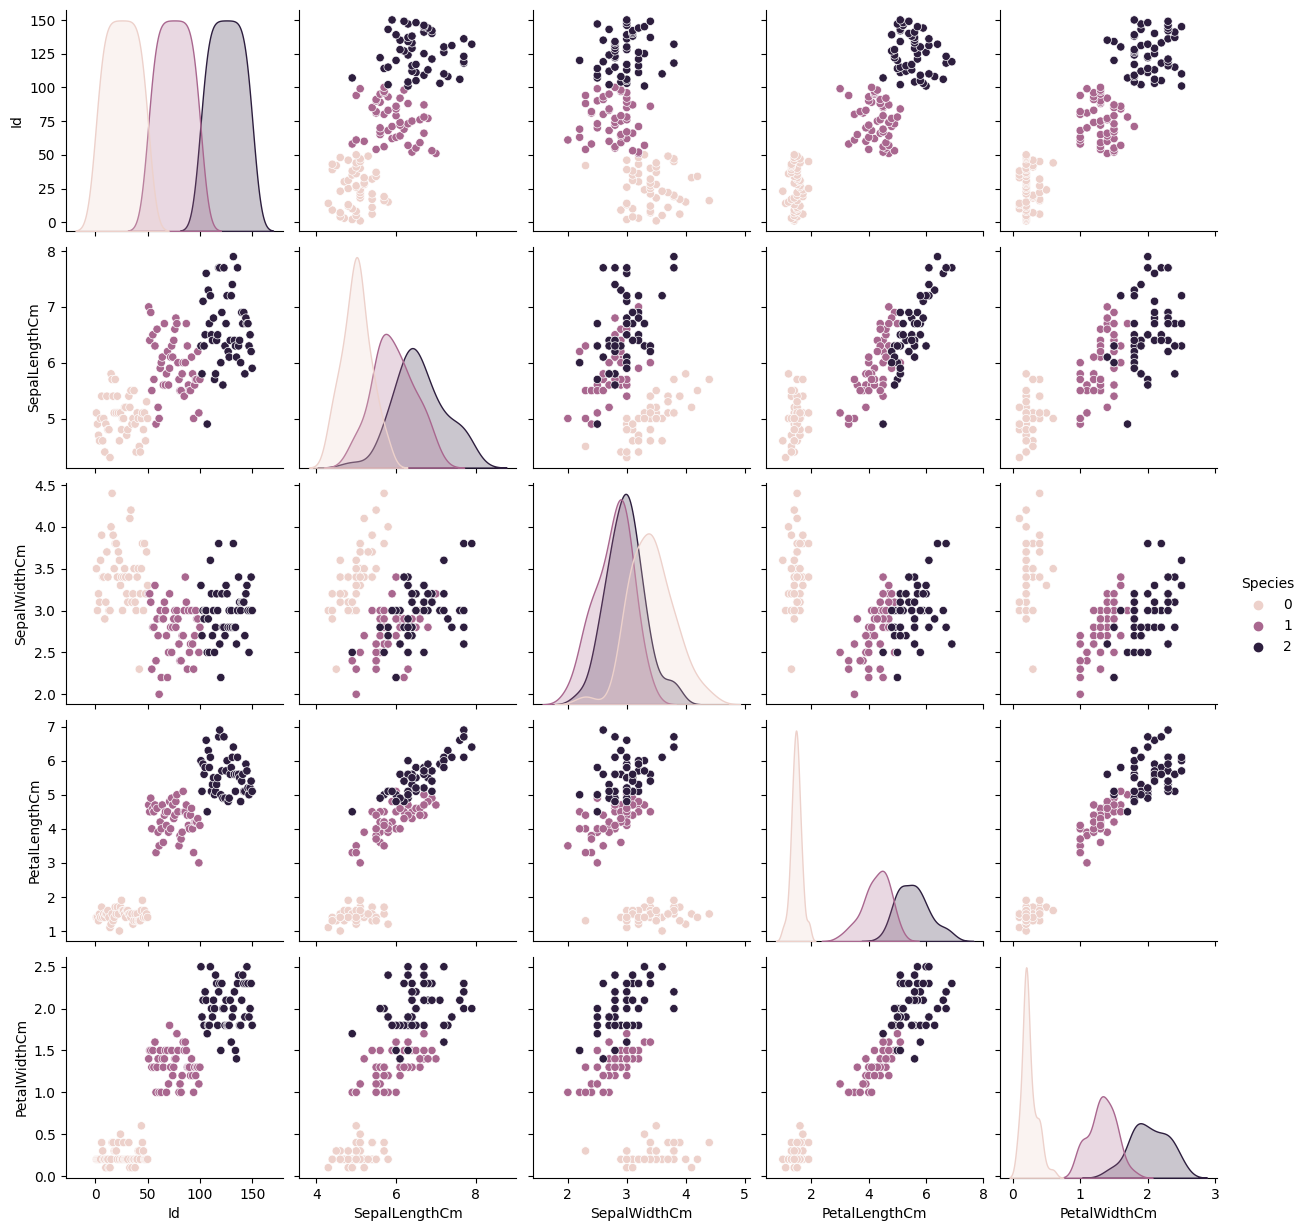

In [11]:
sns.pairplot(df,hue="Species")

<AxesSubplot:>

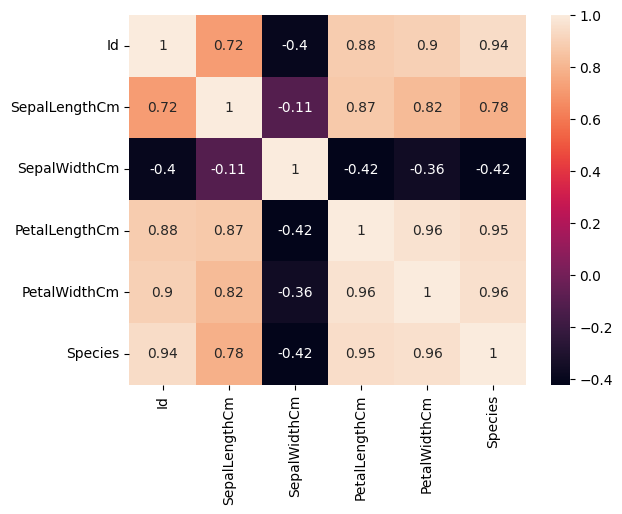

In [12]:
sns.heatmap(df.corr(),annot=True)

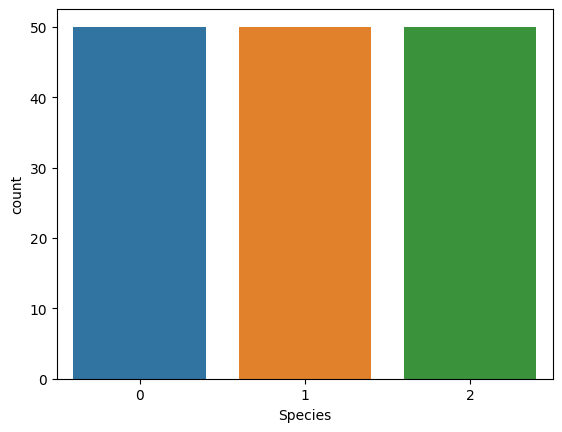

In [13]:
# Species distribution
sns.countplot(x="Species", data=df)
plt.show()

##Comparing Sepal Length and Sepal Width

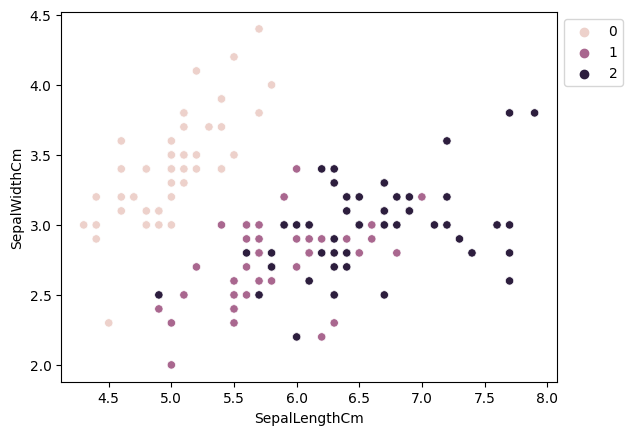

In [14]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=df, )


plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

##Comparing Petal Length and Petal Width

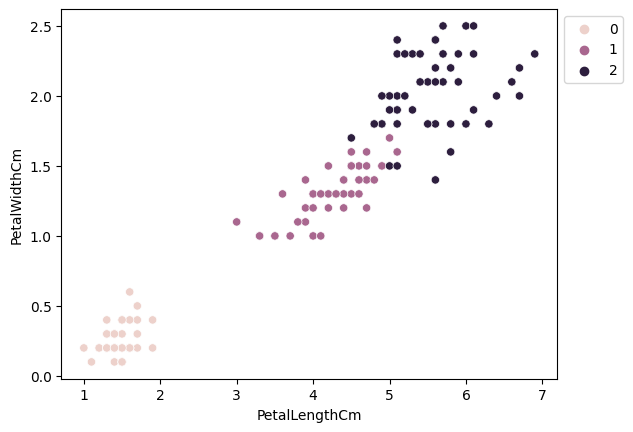

In [15]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=df, )


plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

##Histograms

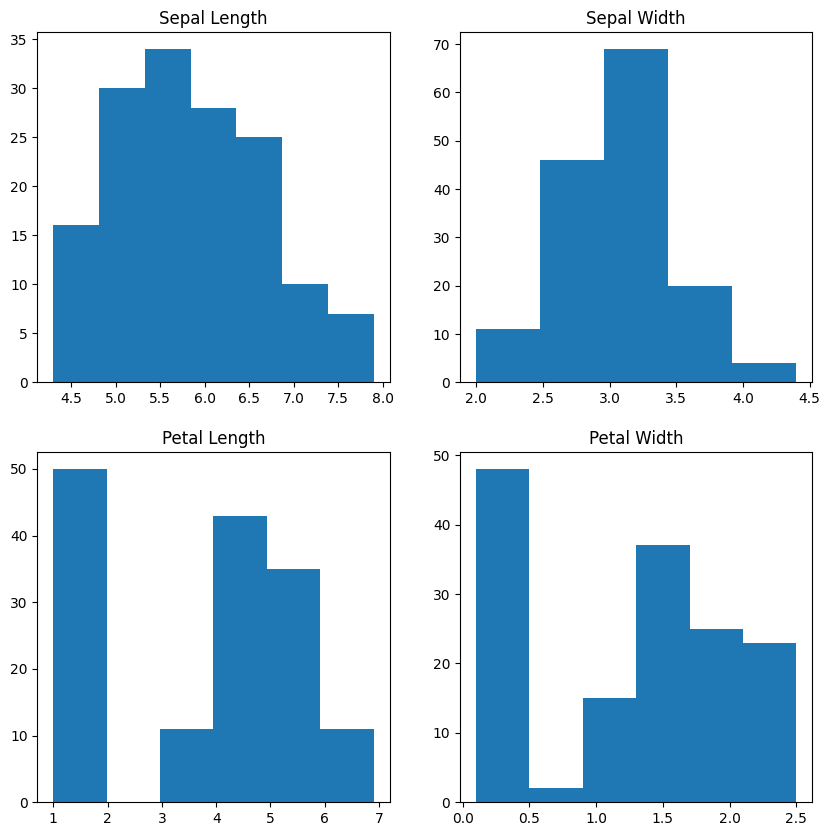

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

## Handling correlation

In [17]:
df.corr(method='pearson')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


##Box Plots

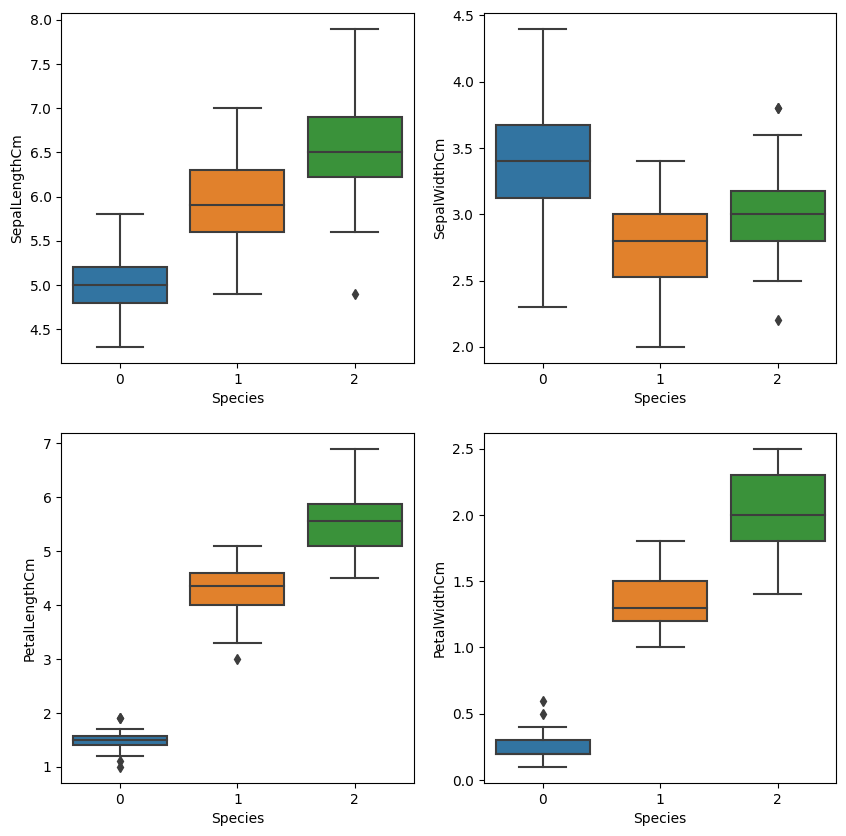

In [18]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=df)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()

##Hnadling outliers

<AxesSubplot:xlabel='SepalWidthCm'>

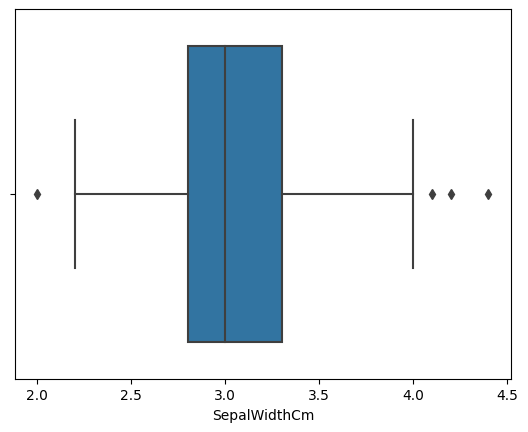

In [19]:

sns.boxplot(x='SepalWidthCm', data=df)

## removing outliers

New Shape:  (146, 6)


<AxesSubplot:xlabel='SepalWidthCm'>

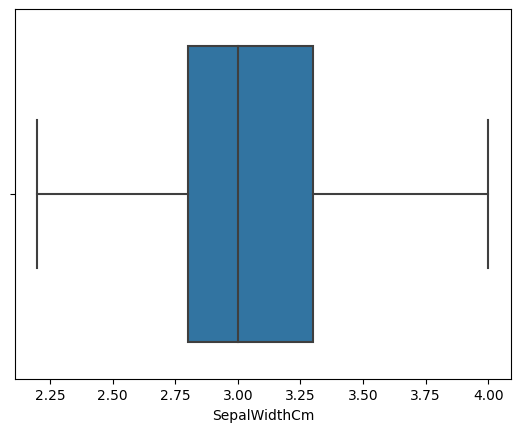

In [20]:
def remove_outliers(data, column):
    Q1 = np.percentile(data[column], 25, interpolation='midpoint')
    Q3 = np.percentile(data[column], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    outliers_index = np.where((data[column] >= upper_bound) | (data[column] <= lower_bound))
    data.drop(outliers_index[0], inplace=True)

# Apply the function to 'SepalWidthCm'
remove_outliers(df, 'SepalWidthCm')

# Print the new shape
print("New Shape: ", df.shape)

# Visualize the boxplot
sns.boxplot(x='SepalWidthCm', data=df)


##Model building

In [21]:
X = df.drop('Species',axis='columns')
y = df['Species']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1,shuffle=True)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [25]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(max_depth=3, subsample=0.8, colsample_bytree=0.8)

In [26]:
# making dictionary of these objects
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [27]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [28]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y1 = clf.predict(x_test)
  accuracy=accuracy_score(y_test,y1)
  precision = precision_score(y_test,y1,average='weighted')

  return accuracy,precision

In [29]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,x_test,y_train,y_test)

  print('for',name)
  print('accuracy',current_accuracy)
  print('precision',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

c:\Users\apoor\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


for SVC
accuracy 0.3333333333333333
precision 0.1111111111111111
for KN
accuracy 1.0
precision 1.0
for NB
accuracy 0.8333333333333334
precision 0.8477272727272727
for DT
accuracy 1.0
precision 1.0
for LR
accuracy 0.9333333333333333
precision 0.9444444444444445
for RF
accuracy 1.0
precision 1.0
for AdaBoost
accuracy 1.0
precision 1.0
for BgC
accuracy 1.0
precision 1.0
for ETC
accuracy 1.0
precision 1.0
for GBDT
accuracy 1.0
precision 1.0
for xgb
accuracy 1.0
precision 1.0


In [30]:
# converting the above result into dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,1.000000,1.000000
3,DT,1.000000,1.000000
5,RF,1.000000,1.000000
6,AdaBoost,1.000000,1.000000
7,BgC,1.000000,1.000000
8,ETC,1.000000,1.000000
9,GBDT,1.000000,1.000000
10,xgb,1.000000,1.000000
4,LR,0.933333,0.944444
2,NB,0.833333,0.847727
